# 2.1 Building a Bayesian model for events (*categorical variables*)

See: https://www.bayesrulesbook.com/chapter-2

In [1]:
options(digits=3);

In [1]:
# Load packages
library(bayesrules);
library(tidyverse);
library(janitor);

# Import article data
data(fake_news);

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.5.0     ✔ purrr   1.0.2
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [2]:
?fake_news

fake_news {bayesrules},R Documentation


In [28]:
fake_news  %>% 
  tabyl(type) %>% 
  adorn_totals("row")

,type,n,percent
,<fct>,<int>,<dbl>
1,fake,60,0.4
2,real,90,0.6
3,Total,150,1.0


In [4]:
fake_news %>% tabyl(title_has_excgl, type) %>% adorn_totals("row")

,title_has_excl,fake,real
,<chr>,<dbl>,<dbl>
1,FALSE,44,88
2,TRUE,16,2
3,Total,60,90


In [4]:
# Define possible articles
article <- data.frame(type = c("real", "fake"))

# Define the prior model
prior <- c(0.6, 0.4)

In [6]:
# Simulate 3 articles
set.seed(84735)
sample_n(article, size = 3, weight = prior, replace = TRUE)

type
<chr>
fake
fake
real


In [5]:
# Simulate 10000 articles
set.seed(84735)
article_sim <- sample_n(article, size = 10000, weight = prior, replace = TRUE)

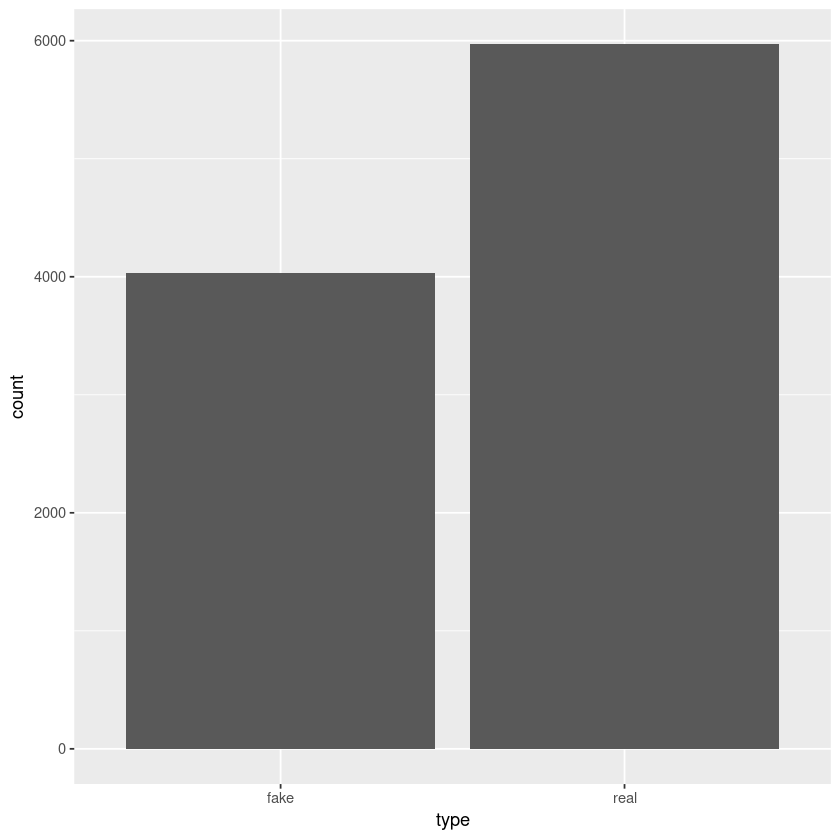

In [8]:
# A bar plot of the fake vs real status of 10,000 simulated articles
ggplot(article_sim, aes(x = type)) +  geom_bar()

In [9]:
article_sim %>% 
  tabyl(type) %>% 
  adorn_totals("row")

,type,n,percent
,<chr>,<int>,<dbl>
1,fake,4031,0.403
2,real,5969,0.597
3,Total,10000,1.000


In [9]:
# let’s simulate the exclamation point usage among these 10,000 articles.
article_sim <- article_sim %>% 
  mutate(data_model = case_when(type == "fake" ~ 0.2667,
                                type == "real" ~ 0.0222))

In [13]:
glimpse(article_sim)

Rows: 10,000
Columns: 2
$ type       <chr> "fake", "fake", "real", "fake", "fake", "real", "real", "re…
$ data_model <dbl> 0.2667, 0.2667, 0.0222, 0.2667, 0.2667, 0.0222, 0.0222, 0.0…


In [16]:
data <- c("no", "yes")

# Simulate exclamation point usage 
set.seed(3)
article_sim <- article_sim %>%
  group_by(1:n()) %>% 
  mutate(usage = sample(data, size = 1, 
                        prob = c(1 - data_model, data_model)))

In [17]:
article_sim %>% 
  tabyl(usage, type) %>% 
  adorn_totals(c("col","row"))

,usage,fake,real,Total
,<chr>,<dbl>,<dbl>,<dbl>
1,no,2961,5833,8794
2,yes,1070,136,1206
3,Total,4031,5969,10000


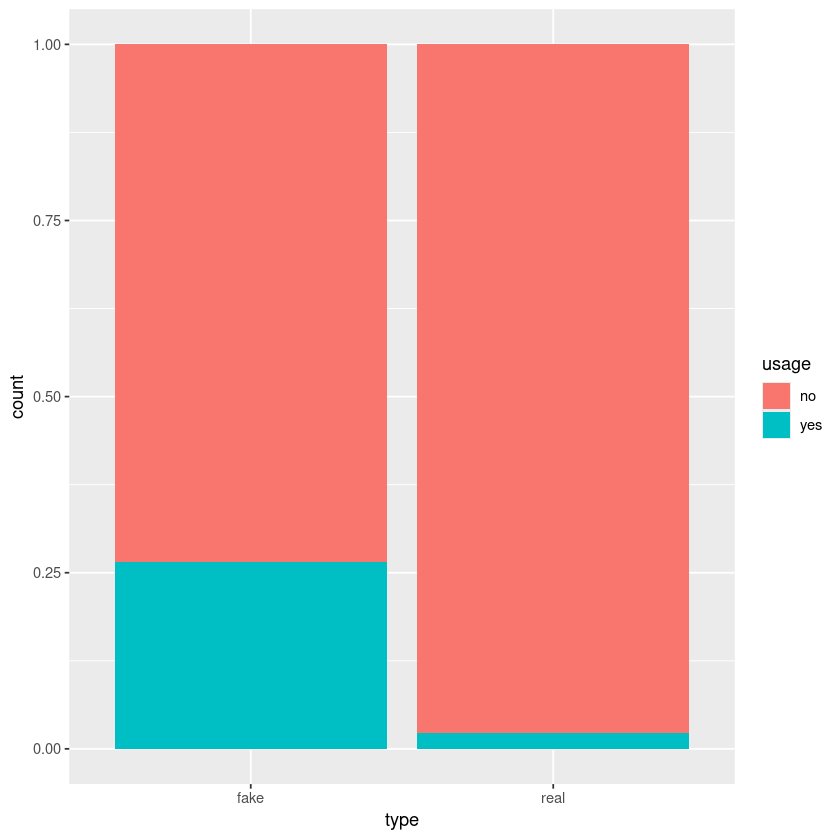

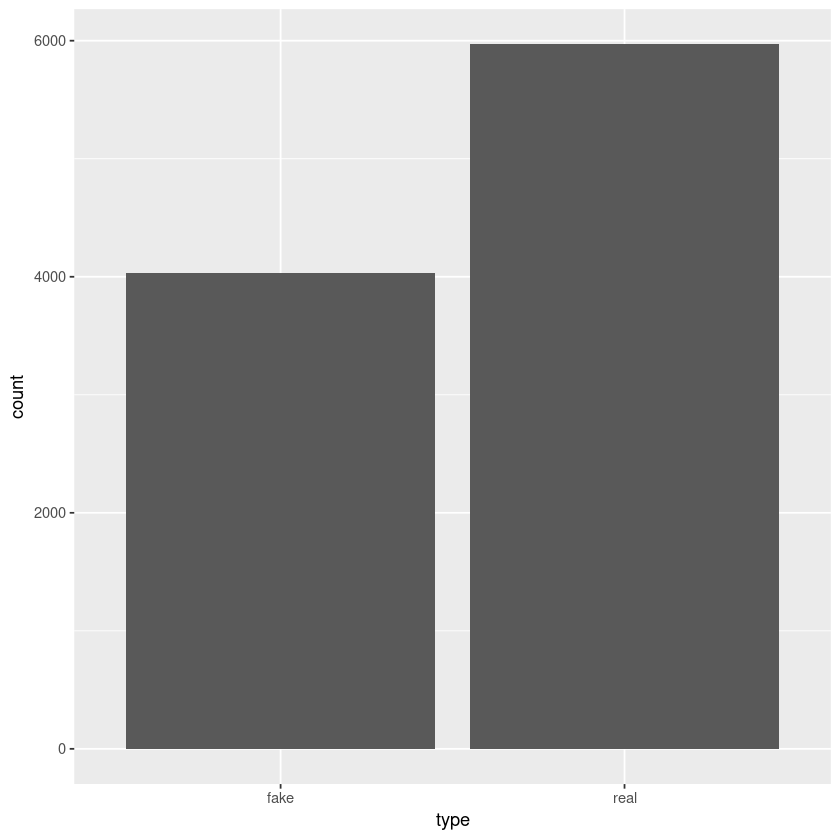

In [14]:
ggplot(article_sim, aes(x = type, fill = usage)) + 
  geom_bar(position = "fill")
ggplot(article_sim, aes(x = type)) + 
  geom_bar()

In [15]:
article_sim %>% 
  filter(usage == "yes") %>% 
  tabyl(type) %>% 
  adorn_totals("row")

,type,n,percent
,<chr>,<int>,<dbl>
1,fake,1070,0.887
2,real,136,0.113
3,Total,1206,1.000


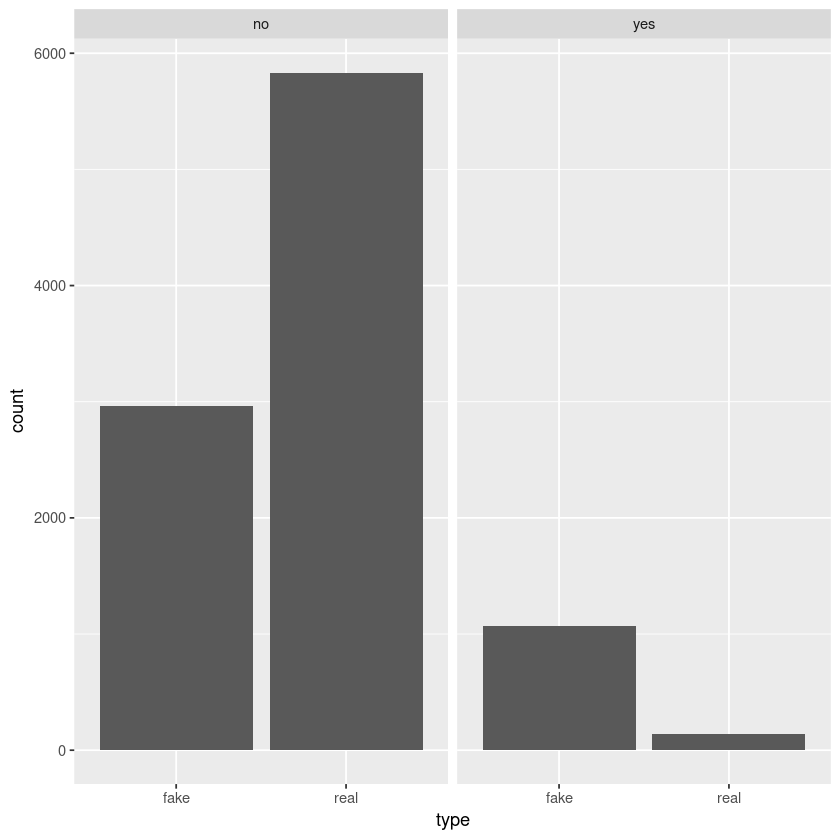

In [16]:
ggplot(article_sim, aes(x = type)) + 
  geom_bar() + 
  facet_wrap(~ usage)

# 2.2 Example: Pop vs soda vs coke

In [42]:
# Load the data
data(pop_vs_soda);

pop_vs_soda %>% tabyl(region) %>% 
  adorn_totals("row");

# Summarize data by region
pop_vs_soda %>% 
  tabyl(pop, region) %>% 
  adorn_percentages("col");

# Total data summary:
pop_vs_soda %>% 
  tabyl(word_for_cola, region) %>% 
  adorn_percentages("all") %>%
  adorn_totals(c("row", "col"));


,region,n,percent
,<fct>,<int>,<dbl>
1,midwest,145096,0.3876981
2,northeast,77188,0.2062472
3,south,90164,0.2409192
4,west,61802,0.1651356
5,Total,374250,1.0000000


pop,midwest,northeast,south,west
<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,0.3552958,0.7266026,0.92077769,0.7057215
TRUE,0.6447042,0.2733974,0.07922231,0.2942785


,word_for_cola,midwest,northeast,south,west,Total
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,coke,0.012833667,0.004021376,0.11896326,0.014370073,0.15018838
2,other,0.009095524,0.009624582,0.02063861,0.009921176,0.04927989
3,pop,0.249950568,0.056387442,0.01908617,0.048595858,0.37402004
4,soda,0.115818303,0.136213761,0.08223113,0.092248497,0.42651169
5,Total,0.387698063,0.206247161,0.24091917,0.165135605,1.00000000


In [45]:
# Prior model of U.S. region:
# region: M    N    S    W   Total
# P:     0.39 0.21 0.24 0.17 1
# sum(c(0.39, 0.21, 0.24, 0.17));
p_a = 0.6447042*0.39 + 0.2733974*0.21 + 0.07922231*0.24 + 0.2942785*0.17
p_a

[1] 0.3778888

In [46]:
# posterior chance the inteviewee livs in the South P(S|A) = P(S) * P(A|S) / P(A)
options(digits = 5); 0.24 * 0.07922231 / p_a

[1] 0.050315

# 2.3 Building a Bayesian model for random variables

In [20]:
# 2.3.7 Posterior simulation
# Define possible win probabilities
chess <- data.frame(pi = c(0.2, 0.5, 0.8))

# Define the prior model
prior <- c(0.10, 0.25, 0.65)

In [21]:
# Simulate 10000 values of pi from the prior
set.seed(84735)
chess_sim <- sample_n(chess, size = 10000, weight = prior, replace = TRUE)

In [22]:
# Simulate 10000 match outcomes
chess_sim <- chess_sim %>% mutate(y = rbinom(10000, size = 6, prob = pi))

# Check it out
chess_sim %>% head(3)

,pi,y
,<dbl>,<int>
1,0.5,3
2,0.5,3
3,0.8,4


In [23]:
# Summarize the prior
chess_sim %>% 
  tabyl(pi) %>% 
  adorn_totals("row")

,pi,n,percent
,<chr>,<int>,<dbl>
1,0.2,1017,0.1017
2,0.5,2521,0.2521
3,0.8,6462,0.6462
4,Total,10000,1.0000


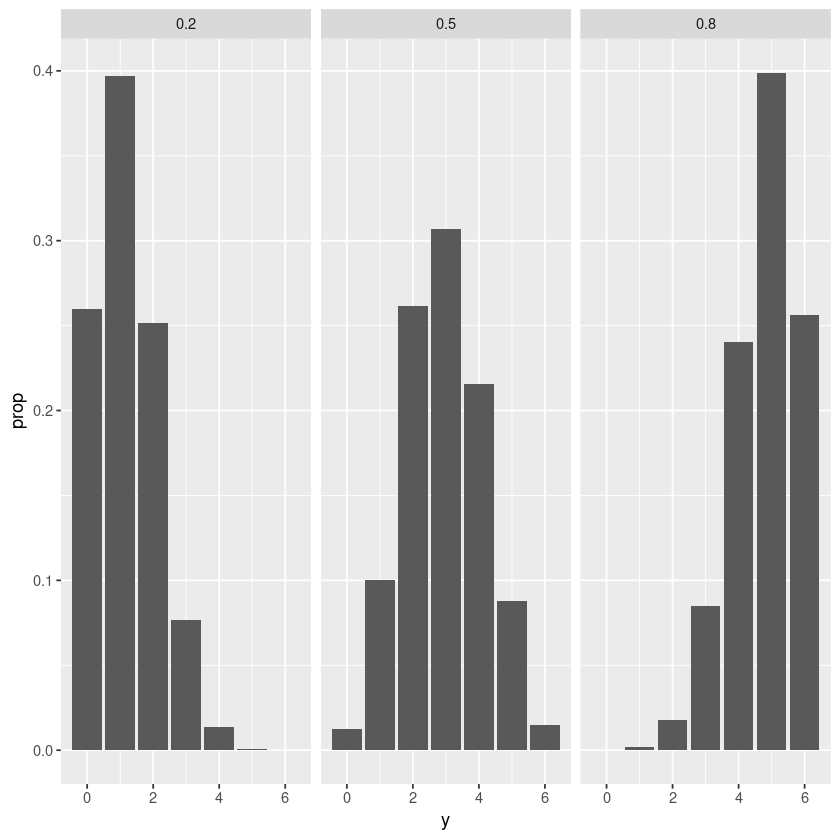

In [24]:
# Plot y by pi
ggplot(chess_sim, aes(x = y)) + 
  stat_count(aes(y = after_stat(prop))) + 
  facet_wrap(~ pi)

In [25]:
# Focus on simulations with y = 1
win_one <- chess_sim %>% 
  filter(y == 1)

# Summarize the posterior approximation
win_one %>% 
  tabyl(pi) %>% 
  adorn_totals("row")

,pi,n,percent
,<chr>,<int>,<dbl>
1,0.2,404,0.603886
2,0.5,253,0.378176
3,0.8,12,0.017937
4,Total,669,1.000000


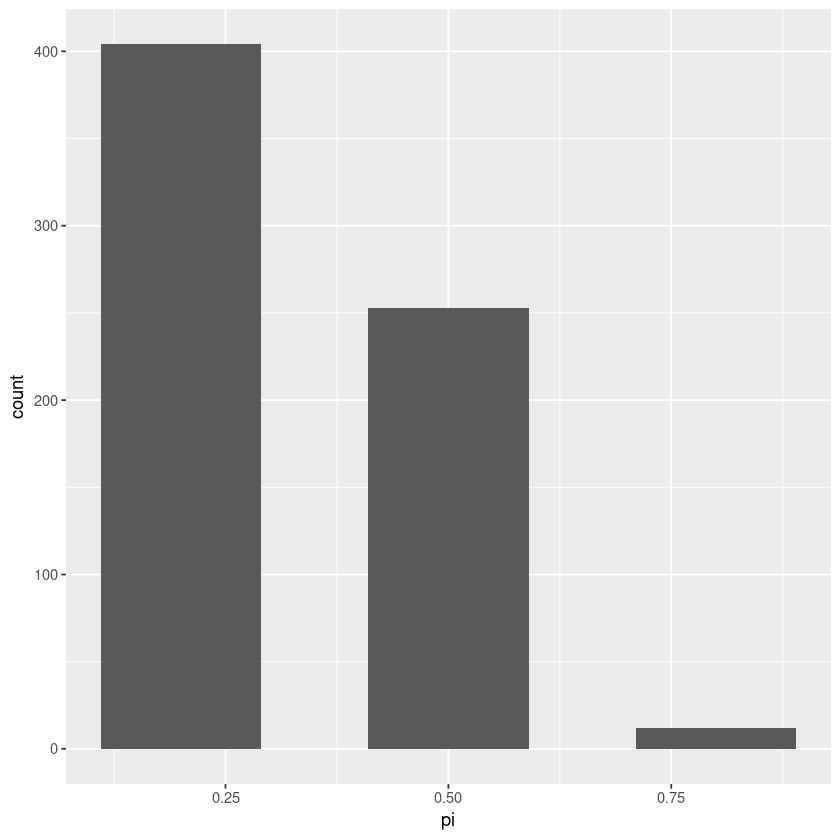

In [26]:
ggplot(win_one, aes(x = pi)) + 
  geom_bar()